image.png

In [1]:
from google.colab import userdata
GROQ_API = userdata.get('GROQ_API')

In [2]:
!pip install -q llama-index llama-index-llms-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00


In [3]:
from llama_index.llms.groq import Groq

llm = Groq(model="llama3-70b-8192", api_key=GROQ_API)

In [4]:
from llama_index.core.chat_engine import SimpleChatEngine

In [5]:
chat_engine = SimpleChatEngine.from_defaults(llm=llm)

In [6]:
chat_engine.chat_repl()

===== Entering Chat REPL =====
Type "exit" to exit.

Human: pode me ajudar com literatura ?
Assistant: Claro que sim! Estou aqui para ajudar com literatura. Qual é o seu pedido de ajuda? Você precisa de:

* Análise de um texto ou obra literária específica?
* Ajuda para entender um conceito ou movimento literário?
* Sugestões de leitura ou recomendações de livros?
* Auxílio para escrever um texto ou trabalho acadêmico sobre literatura?
* Discussão sobre um autor ou obra em particular?

Por favor, forneça mais detalhes sobre o que você precisa, e farei o meu melhor para ajudá-lo!

Human: exit


In [7]:
llm.complete("Consegue me ajudar com duvidas literarias ?")

CompletionResponse(text='Eu estou aqui para ajudar!\n\nSim, posso ajudar com dúvidas literárias. Qual é o assunto ou obra literária que você gostaria de discutir? Você tem alguma pergunta específica sobre um livro, autor ou movimento literário?\n\nPode ser sobre:\n\n* Análise de um texto ou obra literária específica\n* Interpretação de um personagem ou tema\n* Contextualização histórica ou cultural de uma obra\n* Comparações entre obras ou autores\n* Sugestões de leitura ou recomendações de livros\n\nEstou aqui para ajudar e aprender com você!', additional_kwargs={}, raw=ChatCompletion(id='chatcmpl-05801428-472b-4515-a0e8-80cd8a965dcb', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Eu estou aqui para ajudar!\n\nSim, posso ajudar com dúvidas literárias. Qual é o assunto ou obra literária que você gostaria de discutir? Você tem alguma pergunta específica sobre um livro, autor ou movimento literário?\n\nPode ser sobre:\n\n* Análise de

In [8]:
resposta = llm.complete("Consegue me ajudar com duvidas literarias ?").text

In [9]:
print(resposta)

Eu estou aqui para ajudar!

Sim, posso ajudar com dúvidas literárias. Qual é o tema ou obra literária que você gostaria de discutir? Você tem alguma pergunta específica sobre um autor, livro ou movimento literário?

Se você precisar de ajuda com:

* Análise de um texto ou obra literária
* Interpretação de um personagem ou tema
* Contextualização histórica de uma obra
* Comparações entre obras ou autores
* Ou qualquer outra coisa relacionada à literatura...

Sinta-se à vontade para perguntar!


In [10]:
duvida_user = "Recomende livros de romance"

In [11]:
resposta = llm.complete(duvida_user).text
print(resposta)

Romance! Aqui vão algumas recomendações de livros de romance que você pode gostar:

**Clássicos**

1. "Pride and Prejudice" de Jane Austen - Um clássico do gênero que segue a história de Elizabeth Bennet e Mr. Darcy.
2. "Jane Eyre" de Charlotte Brontë - A história de uma jovem governanta que se apaixona pelo seu patrão, Mr. Rochester.
3. "Wuthering Heights" de Emily Brontë - Um romance trágico sobre a paixão entre Catherine e Heathcliff.

**Contemporâneos**

1. "The Notebook" de Nicholas Sparks - Uma história de amor que dura décadas, entre dois jovens que se separam e se reencontram anos mais tarde.
2. "Me Before You" de Jojo Moyes - Uma história emocionante sobre uma jovem que se apaixona pelo seu paciente, um homem que sofreu um acidente.
3. "The Fault in Our Stars" de John Green - Uma história de amor entre dois adolescentes que lutam contra o câncer.

**Romance Ligeiro**

1. "Eleanor Oliphant is Completely Fine" de Gail Honeyman - Uma história de amor que se desenvolve entre uma m

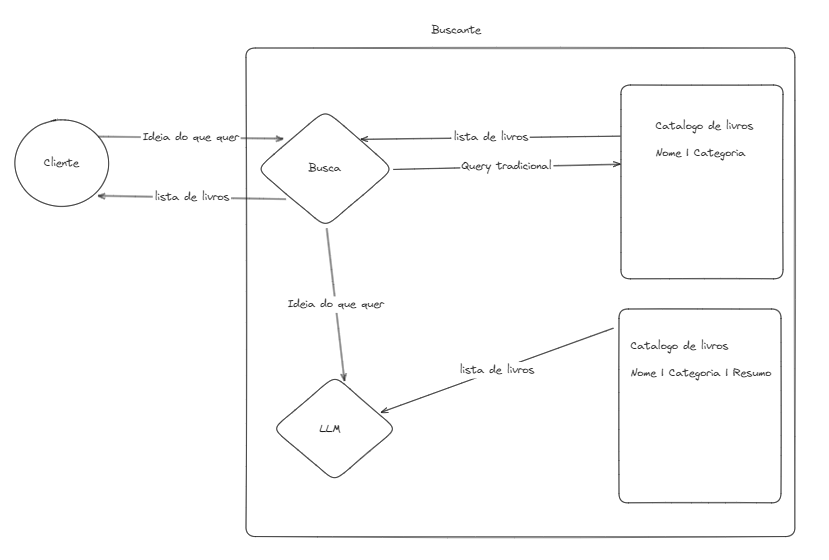

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('csv/livros_mais_vendidos.csv')

In [16]:
df.head()

nome  categoria  \
0  É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)   Romances   
1                                   TUDO É RIO   Romances   
2              VERITY (EDIÇÃO DE COLECIONADOR)  Suspenses   
3                              TÁTICAS DO AMOR   Romances   
4                                 NEM TE CONTO   Romances   

                                             sinopse     preco  
0  Todo final tem um começo. Agora em uma edição ...  R$ 94,90  
1                                                NaN  R$ 71,39  
2  Um casal apaixonado. Uma intrusa. Três mentes ...  R$ 79,90  
3  Febre no TikTok, comédia romântica narra a ami...  R$ 65,89  
4  Da autora best seller do \n                   ...  R$ 59,90

In [17]:
prompt = "Só recomende livros dessa base de dados:"

In [18]:
for linha in df.values:
  prompt += "\n" + linha[0]

In [19]:
prompt

'Só recomende livros dessa base de dados:\nÉ ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)\nTUDO É RIO\nVERITY (EDIÇÃO DE COLECIONADOR)\nTÁTICAS DO AMOR\nNEM TE CONTO\nO BEIJO DA NEVE\nQUARTA ASA\nVÉSPERA\nA MANDÍBULA DE CAIM\nEU E ESSE MEU CORAÇÃO\nFOGO & SANGUE – VOLUME 1\nJANTAR SECRETO\nIMPERFEITOS\nTUDO SOBRE O AMOR - NOVAS PERSPECTIVAS\nÉ ASSIM QUE ACABA\nUMA SEGUNDA CHANCE (FENÔMENO DO TIKTOK)\nA HORA DA ESTRELA\nIMPOSTORA: YELLOWFACE\nCHAMA DE FERRO\nA EMPREGADA ESTÁ DE OLHO (A EMPREGADA – LIVRO 3)\nA GUERRA DA PAPOULA VOL.1\nORAÇÃO PARA DESAPARECER\nUNICÓRNIOS - BORRACHAS DIVERTIDAS\nA BIBLIOTECA DA MEIA-NOITE\nA PACIENTE SILENCIOSA\nCOMECE PELO PORQUÊ\nCOMO CHEGAR AO SIM\nAS PRÁTICAS PARA A PROSPERIDADE DE O HOMEM MAIS RICO DA BABILÔNIA DE GEORGE S. CLASON\nSTORYBRAND\nO INVESTIDOR INTELIGENTE\nO JOGO INFINITO\nO MAIOR VENDEDOR DO MUNDO\nO MONGE E O EXECUTIVO\nANTIFRÁGIL (NOVA EDIÇÃO)\nMAESTRIA\nDEIXE DE SER POBRE\nESSENCIALISMO\nOS 5 DESAFIOS DAS EQUIPES\nRÁPIDO E DEVAGAR\nCALMA

In [20]:
resposta = llm.complete(prompt + duvida_user).text
print(resposta)

Aqui vão algumas recomendações de livros de romance baseadas na lista que você forneceu:

1. **É Assim que Começa** (edição de colecionador) - Um romance emocionante que explora a complexidade dos relacionamentos.
2. **Verity** (edição de colecionador) - Um thriller romântico que vai mantê-lo na beira do assento.
3. **Táticas do Amor** - Um romance leve e divertido que explora as estratégias do amor.
4. **Nem Te Conto** - Um romance emocionante que explora a complexidade dos relacionamentos.
5. **Eu e Esse Meu Coração** - Um romance emocionante que explora a complexidade dos relacionamentos.
6. **Jantar Secreto** - Um romance leve e divertido que explora as estratégias do amor.
7. **Imperfeitos** - Um romance emocionante que explora a complexidade dos relacionamentos.
8. **Tudo Sobre o Amor - Novas Perspectivas** - Um romance emocionante que explora a complexidade dos relacionamentos.
9. **É Assim que Acaba** - Um romance emocionante que explora a complexidade dos relacionamentos.
10. 

In [21]:
prompt = """
Somente responda em json
Formato resposta em json
[data:{
  "livros": [
    {
      "titulo": "Titulo do livro
      "categoria": "Categoria do livro"
      "Justificativa" "Porque recomenda"
    }
  ]
}]
Só recomende livros dessa base de dados:
"""

In [22]:
for linha in df.values:
  prompt += f"\n{linha[0]}"

In [23]:
entrada_user = "Recomende livros de romance"

In [24]:
resposta = llm.complete(prompt=prompt+entrada_user).text
print(resposta)

{
"data": {
"livros": [
{
"titulo": "TUDO É RIO",
"categoria": "Romance",
"Justificativa": "Um romance que explora a cidade do Rio de Janeiro e as histórias de amor que acontecem nela."
},
{
"titulo": "VERITY (EDIÇÃO DE COLECIONADOR)",
"categoria": "Romance",
"Justificativa": "Um romance que explora a complexidade dos relacionamentos e a verdade sobre o amor."
},
{
"titulo": "TÁTICAS DO AMOR",
"categoria": "Romance",
"Justificativa": "Um livro que ensina como conquistar o coração de alguém e manter o amor vivo."
},
{
"titulo": "NEM TE CONTO",
"categoria": "Romance",
"Justificativa": "Um romance que explora a complexidade dos relacionamentos e a importância da comunicação em um relacionamento."
},
{
"titulo": "EU E ESSE MEU CORAÇÃO",
"categoria": "Romance",
"Justificativa": "Um livro que explora a importância de se amar e se aceitar para encontrar o amor verdadeiro."
}
]
}
}


In [25]:
import json

In [26]:
resposta_json = json.loads(resposta)

In [27]:
resposta_json['data']['livros'][0]['titulo']

'TUDO É RIO'

In [28]:
df.head()

nome  categoria  \
0  É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)   Romances   
1                                   TUDO É RIO   Romances   
2              VERITY (EDIÇÃO DE COLECIONADOR)  Suspenses   
3                              TÁTICAS DO AMOR   Romances   
4                                 NEM TE CONTO   Romances   

                                             sinopse     preco  
0  Todo final tem um começo. Agora em uma edição ...  R$ 94,90  
1                                                NaN  R$ 71,39  
2  Um casal apaixonado. Uma intrusa. Três mentes ...  R$ 79,90  
3  Febre no TikTok, comédia romântica narra a ami...  R$ 65,89  
4  Da autora best seller do \n                   ...  R$ 59,90

In [29]:
for livro in resposta_json['data']['livros']:
  titulo = livro['titulo'].upper()

  if df.query("nome == @titulo").empty:
    print(f"Livro {titulo} não encontrado")

In [30]:
# livro_novo =    {'titulo': 'Não existe',
#       'categoria': 'Romance',
#       'Justificativa': 'Um romance que vai levar você a uma jornada emocionante pela cidade do Rio de Janeiro.'}

In [31]:
# resposta_json["data"]["livros"].extend([livro_novo])

In [32]:
# for livro in resposta_json['data']['livros']:
#   titulo = livro['titulo'].upper()

#   if df.query("nome == @titulo").empty:
#     print(f"Livro {titulo} não encontrado")

image.png

In [34]:
!pip install -q llama-index-embeddings-huggingface

In [36]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [37]:
embed_model = HuggingFaceEmbedding(model_name="intfloat/multilingual-e5-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [48]:
class ChromaEmbeddingsWrapper:
  def __init__(self, model_name):
        self.model = HuggingFaceEmbedding(model_name=model_name)

  def __call__(self, input):
    return self.model.embed(input)

embed_model_chroma = ChromaEmbeddingsWrapper("intfloat/multilingual-e5-large")

In [ ]:
!pip install -q llama-index-vector-stores-chroma

In [49]:
import chromadb

db = chromadb.PersistentClient(path="./chroma_db")
chroma_client = db

collection_name = "meus_documentos"

chroma_collection = chroma_client.get_or_create_collection(name=collection_name, embedding_function=embed_model_chroma)

In [57]:
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext

In [58]:
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storege_context = StorageContext.from_defaults(vector_store=vector_store)

In [59]:
from llama_index.core import SimpleDirectoryReader

In [60]:
documents = SimpleDirectoryReader(input_dir="csv").load_data()

In [61]:
from llama_index.core import VectorStoreIndex

In [62]:
index = VectorStoreIndex.from_documents(documents, storage_context=storege_context, embed_model=embed_model)

In [63]:
query_engine = index.as_query_engine(similarity_top_k=2, llm=llm)

In [65]:
response = query_engine.query("Livros de romance").response

In [66]:
print(response)

Based on the provided context, the romance books mentioned are:

1. "O beijo da neve" by Babi A. Sette
2. "MIL VEZES AMOR" by Lynn Painter


In [67]:
query_str = "Livros de romance"

In [68]:
query_embeded = embed_model.get_text_embedding(query_str)

In [70]:
chroma_collection.query(query_embeded, n_results=2, include=['distances', 'embeddings'])

{'ids': [['a9b5a8c9-15a6-4279-9a03-024fd47f6141',
   'd3a69807-b40b-4bf2-8a28-adb3ec151899']],
 'embeddings': [array([[ 0.02034744,  0.00922662, -0.02066277, ...,  0.00392679,
          -0.00175007,  0.03043895],
         [-0.00019601, -0.01406414, -0.00478697, ..., -0.00782367,
          -0.03109999,  0.03047546]])],
 'documents': None,
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.3427867329457754, 0.3550027914736404]],
 'included': [<IncludeEnum.embeddings: 'embeddings'>,
  <IncludeEnum.distances: 'distances'>]}

In [72]:
docs_ids = chroma_collection.get()['ids']
print(f"Total de IDs: {len(docs_ids)}")
print("Amostra de IDs:", docs_ids[:5])

Total de IDs: 72
Amostra de IDs: ['bc746ea8-155b-4bc1-bc46-a37563e76296', 'd444c78d-f365-483f-9334-3c72b6344e5c', '6176f8d2-3ae9-4856-92b4-c65ca8d9ff38', 'a9b5a8c9-15a6-4279-9a03-024fd47f6141', 'd9427b16-f4ab-4406-ab06-fff6033df854']


In [73]:
chroma_collection.get('bc746ea8-155b-4bc1-bc46-a37563e76296')

{'ids': ['bc746ea8-155b-4bc1-bc46-a37563e76296'],
 'embeddings': None,
 'documents': ['É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR), Romances, Todo final tem um começo. Agora em uma edição especial de colecionador, com pintura trilateral e exclusiva para o Brasil, conheça a sequência de \n                        É assim que acaba\n                        . Da autora best-seller mundial e fenômeno editorial Colleen Hoover, que já vendeu mais de dois milhões de livros no país.\n                    \n                \n                \n                \xa0\n                \n                Lily Bloom continua administrado uma floricultura. Seu ex-marido abusivo, Ryle Kincaid, ainda é um cirurgião. Mas agora os dois estão oficialmente divorciados e dividem a guarda da filha, Emerson.\n                \n                Quando Lily esbarra em Atlas — com quem não fala há quase dois anos —, é inegável que os dois podem retomar o relacionamento da adolescência, já que ele também está solteiro 